# **CAP-417: Estatística Computacional (Computational Statistics)**

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/thedice.jpg" alt="Drawing" width="350"/>

<br>

# ***Continuous Random Variables and Probability Distributions***
-----

This notebook was developed by Prof. <a href="https://www.linkedin.com/in/valdivino-alexandre-de-santiago-j%C3%BAnior-103109206/?locale=en_US">Valdivino Alexandre de Santiago Júnior</a> for the Computational Statistics CAP course at INPE.</a>

<br>

Most of this material was based on: R. E. Walpole, R. H. Myers, S. L. Myers, K. E. Ye. <a href="https://www.pearson.com/us/higher-education/product/Walpole-Probability-and-Statistics-for-Engineers-and-Scientists-9th-Edition/9780321629111.html">Probability and Statistics for Engineers and Scientists, 9th Edition</a>. Pearson, 2012.

<br>

**Licence**: GNU GENERAL PUBLIC LICENSE, Version 3 (GPLv3)



## Random Variable: Remembering
----

A **random variable** is a function that reflects the result of a random experiment. It associates a real number with each element $s \in S$.

<br>

For instance, the result of the experiment "toss a single die" can be described by a random variable $X \Rightarrow X = \{1, 2, 3, 4, 5, 6\}$. 

<br>

Another example: two balls are drawn in succession without replacement from an urn containing 4 red balls and 3 black balls. Hence, the number of red balls is a random variable $X \Rightarrow X = \{0, 1, 2\}$.

<br>

A random variable is described by the possible values that it can assume ($x$) and by the probabilities for each of these values ($f(x)$).




##Continuous Random Variable 
----

A **continuous random variable** can assume all values in the interval $[a, b]$, where $-\infty \leq a < b \leq +\infty$. 


<br>

For instance, consider the waiting time, in hours, between successive speeders spotted by a radar unit. The random variable $X$ takes on all values $x$ for which $x \geq 0$ is a continuous random variable.

<br>

Let us consider a random variable $X$ that represents the height of the human beings. This is another example of a continuous random variable.





## Continuous Probability Distributions
----

Note that a continuous random variable $X$ has a probability of 0 of assuming **exactly** any of its values. Let $X$ be a continuous random variable representing the heights of all people over 21 years of age. Hence:


1.   Between any two values, say 163.5 and 164.5 cm, there are infinite number of heights, one of which is 164 cm;
2.   The probability of selecting a person at random who is exactly 164 cm tall and not one of the infinitely large set of heights so close to 164 cm is remote. It is then assigned a probability of 0 to the event;
3.   It is not the case to wonder about the probability of selecting a person who is at least 163 cm but not more than 165 cm tall. We think here in terms of interval rather than a point value of $X$.

<br>

The probability distribution of a continuous random variable cannot be presented in tabular form. But, it can be stated as a formula. 

<br>

Below, it is the definition of a **probability density function** (**pdf**), also known as **density function**, related to continuous random variables.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/pdfcont.png" alt="Drawing" width="600"/>

<br>

Note below that the probability that the continuous random variable $X$ assumes a value between $a$ and $b$ is equal to the shaded **area** under the pdf between the ordinates at $x = a$ and $x = b$.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/pdfarea.png" alt="Drawing" width="600"/>




## Cumulative Distribution Function
----

The **cumulative distribution function** (cdf) of a continuous random variable is defined below.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/cdfcont.png" alt="Drawing" width="600"/>


<br>

Ex: Let $X$ be a continuous random variable which has the pdf $f(x)  =  3 $ on  $[0, 1/3]$. Calculate:

1.  $ P (0.1  \leq  X \leq  0.2) $; 

2. Find the cdf.


R. Item 1

 $ P (0.1  \leq  X \leq  0.2) = \int_{0.1}^{0.2} 3 \,dx = 3 \times 0.2 - 3 \times 0.1 = 0.3 $ 

Item 2

If $v \in [0,1/3] \Rightarrow F(v)= \int_{0}^{v} 3 \,dx = 3v$.

Note that $f(x) = 0$ outside of $[0, 1/3]$. Hence, $F(v) = P(X \leq v) = 0$ for $v < 0$ and $F(v) = 1$ for $v >1/3$. 

Thus:

$$
 F(v) =
  \begin{cases}
    0,  & \quad \text{if } v < 0\\
    3v,  & \quad \text{if } 0 \leq v \leq 1/3 \\
    1,  & \quad \text{if } v > 1/3.
  \end{cases}
$$




In [ ]:
from scipy.integrate import quad

def integrand(x, f):
    return f # Change to f*x

fn = 3
prob = quad(integrand, 0.1, 0.2, args=(fn))

print('Value of the integral: {} - Upper bound on the error: {}'.format(prob[0],prob[1]))


Value of the integral: 0.30000000000000004 - Upper bound on the error: 3.33066907387547e-15


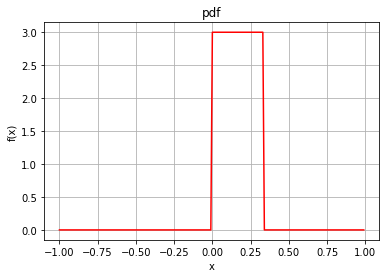

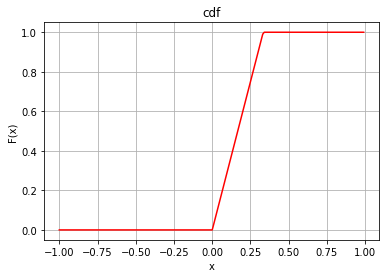

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1, 1, 0.01)
f_x = [] # pdf
F_x = [] # cdf
for i in x:
  if i < 0:
    f_x.append(0)
    F_x.append(0)
  elif (i >=0) and (i<=1/3):
    f_x.append(3)
    F_x.append(3*i) 
  elif i > 1/3:
    f_x.append(0)
    F_x.append(1)   

plt.plot(x, f_x, 'r')
plt.title('pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.plot(x, F_x, 'r')
plt.title('cdf')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.show()

## Continuous Uniform Distribution
----

This is the continuous conterpart of the discrete uniform distribution. Hence, the **continuous uniform distribution** is characterized by a pdf that is "flat", and thus the probability is uniform in a closed interval, say $[A, B]$. Note that the previous example is precisely a case of a continuous uniform distribution.

Below we define the pdf of a continuous uniform random variable.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/unicont.png" alt="Drawing" width="600"/>

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/unicontpdfcdf.png" alt="Drawing" width="600"/>

<br>
Source: <a href="https://distribution-explorer.github.io/continuous/uniform.html?highlight=continuous%20uniform">Distribution Explorer</a>

<br>
<br>

Note that the continuous uniform distribution is not defined on an infinite or semi-infinite domain, so finite lower ($A$) and upper ($B$) bounds are necessary parameters.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/unicontmeanvar.png" alt="Drawing" width="600"/>

<br>
<br>


Question: How to calculate the mean (expected value) and variance of a continuous random variable?

<br>

One application of the continuous uniform distribution is in the generation of real random numbers.


Ex: Let us assume that an event (show) can last from 1 to 6 hours so that each fraction of hour has equal chance to be the length of the event. If $X$ is a continuous random variable representing the length (duration) of the event in hours, what is the probability that an event lasts at least 2 hours?

R: $[A, B] = [1, 6]$. Thus, the pdf is:

$$
 f(x;1,6) =
  \begin{cases}
    1/5,  & \quad \text{if } 1 \leq v \leq 6\\
    0,  & \quad \text{elsewhere}.  
  \end{cases}
$$

Thus,
$$
P(X >= 2) = \int_{2}^{6} 1/5 \,dx = 1/5 \times (6 - 2) = 0.8.
$$





Value of the integral: 0.8000000000000002 - Upper bound on the error: 8.881784197001254e-15


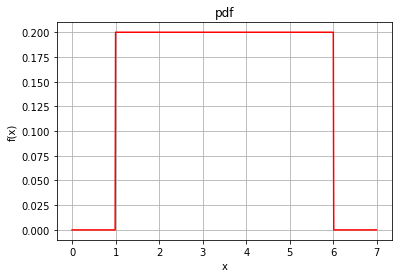

In [ ]:
fn = 1/5
prob = quad(integrand, 2, 6, args=(fn))
print('Value of the integral: {} - Upper bound on the error: {}'.format(prob[0],prob[1]))

x = np.arange(0, 7, 0.01)
f_x = []
for i in x:
  if (i>=1) and (i<=6):
    f_x.append(1/5)
  else:  
    f_x.append(0)

plt.plot(x, f_x, 'r')
plt.title('pdf')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

## Gamma Distribution
----

The **gamma and exponential distributions** are two important continuous probability distributions playing an important role in both queuing theory and reliability problems. Note that the exponential distribution is a special case of the gamma one. We start by first addressing the gamma distribution.

<br>

The gamma function is important in several fields of mathematics and the **gamma distribution** derives its names due to this function.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/gammafunction.png" alt="Drawing" width="600"/>

<br>

The gamma function has some properties where one is: $\Gamma(1) = 1$. 


In [ ]:
import math

def integrand2(x, f):
    return  math.exp(-x)

fn2 = 0
prob2 = quad(integrand2, 0, math.inf, args=(fn2))

print('Value of the integral: {} - Upper bound on the error: {}'.format(prob2[0],prob2[1]))

Value of the integral: 1.0000000000000002 - Upper bound on the error: 5.842606742906004e-11


The definition of the pdf of a random variable which has a gamma distribution is below.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/gammadist.png" alt="Drawing" width="600"/>

<br><br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/gammaplots.png" alt="Drawing" width="600"/>

<br><br>

Mean and variance of the gamma distribution below.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/gammameanvar.png" alt="Drawing" width="600"/>




## Exponential Distribution
----

The **exponential distribution** is a special case of the gamma one where $\alpha = 1$. We can define the pdf of a random variable which has a exponential distribution as follows.

<br>

**Exponential Distribution:** The continuous random variable $X$ has an exponential distribution, with parameter (rate of occurence of events) $\lambda = 1/\beta$, if its pdf is given by:

$$
f(x;\lambda) =
  \begin{cases}
     \lambda e^{-\lambda x},      & \quad \text{if} \quad x \geq 0 \\
    0, & \quad  \text{otherwise} 
  \end{cases}
$$

where $\lambda >0$.

<br>

The cdf is:

$$
F(x;\lambda) =
  \begin{cases}
    1 - e^{-\lambda x},      & \quad \text{if} \quad x \geq 0 \\
    0, & \quad  \text{otherwise}. 
  \end{cases}
$$  


<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/exppdfcdf.png" alt="Drawing" width="600"/>

Source: <a href="https://distribution-explorer.github.io/continuous/exponential.html?highlight=exponential">Distribution Explorer</a>


<br>
<br>


Mean and variance of the exponential distribution below.

$$
\mu = 1/\lambda \quad \text{and} \quad \sigma^2 = 1/\lambda^2.
$$

<br> 

The exponential distribution is commonly used to measure the expected time for an event to occur. Hence, the time between arrivals at service facilities and the time to failure of computing systems/devices are often modelled by the exponential distribution.


 






## Relationship between the Exponential Distribution and the Poisson Process
----

There is a relationship between the exponential distribution and the Poisson process, where the latter we have already described. The most important applications of the exponential distribution are situations where the Poisson process applies. Recall that the Poisson process allows for the use of the discrete probability distribution known as the Poisson distribution. Recalling again that the Poisson distribution is used to compute the probability of specific numbers of "events" during a particular **period of time or span of space**. 

<br>

In order to understand the relationship between the exponential distribution and the Poisson process, let us consider that, in a Poisson process, if events occur on average at the rate $\lambda$ per unit of time, then there will
be on average $\lambda t$ occurrences per $t$ units of time. The Poisson distribution describing this process is therefore:

$$
 p(x;\lambda t)= \frac{e^{-\lambda t}(\lambda t)^x}{x!},
$$ 

from which $P (X = 0) = p(0;\lambda t) = e^{-\lambda t}$ is the probability of no occurrences (no events happened) within $t$ units of time.

<br>

We can also interpret $P (X = 0) = e^{-\lambda t}$ as being the probability that the time, $T$, to the first occurrence is greater than $t$:

$$
P (T > t) = P (X = 0 \quad | \quad \mu = \lambda t) = e^{−\lambda t}.
$$

<br>

On the other hand, the probability that an event does indeed occur during $t$ units of time is given by:

$$
P (T ≤ t) = 1 − P (X = 0 \quad | \quad \mu = \lambda t) = 1 − e^{−\lambda t}.
$$

<br>

However, just above is the cdf of the exponential distribution which, when differentiated with respect to $t$, produces the pdf of the exponential distribution, i.e. $f(t) = \lambda e^{−\lambda t}$.


## Relationship between the Exponential Distribution and Markov Chains (Continuous)
----

Markov chains provide very flexible, powerful, and efficient means for the
description and analysis of dynamic system properties. Performance and dependability measures can be easily derived. It is a powerful technique which has long been studied by academia and used in practice.

<br>

Markov chains are stochastic processes where the next state of the system depends only on the present state, not on preceeding states (**memoryless**). Here, we just recall property 1 of the Poisson process:

1.  The number of outcomes occurring in one time interval or specified region of
space is independent of the number that occur in any other disjoint time interval or region. In this sense we say that the Poisson process has **no memory**.

<br>

Two known Markov Chains models are:

1.  Discrete-Time Markov Chain (DTMC): states are discrete and time is dicrete;
2.  Continuous-Time Markov Chain (CTMC): states are discrete and time is continuous.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/dtmcctmc.png" alt="Drawing" width="600"/>

<br>

We are interessed here in the CTMC model. CTMCs are distinct from DTMCs because state transitions may occur at arbitrary instants of time and not merely at fixed, discrete time points, as is the case with DTMCs. One definition of CTMC is provided below.

<br>

**CTMC:** A given stochastic process $\{X_t : t \in T\}$ constitutes a
CTMC if for arbitrary $t_i \in \mathbb{R}_{0}^{+}$, with $0 = t_0 < t_1 < \cdots < t_n < t_{n+1}$, $\forall n \in \mathbb{N}$, and $\forall s_i \in S = \mathbb{N}_0$ for the conditional pdf, the following relation holds:

<br>

\begin{eqnarray*}
P(X_{t_{n+1}} = s_{n+1} \quad \vert \quad  X_{t_{n}} = s_{n}, X_{t_{n-1}} =  s_{n-1}, \cdots, X_{t_{0}} = s_{0} ) = \\ 
P(X_{t_{n+1}} = s_{n+1} \quad \vert \quad X_{t_{n}} = s_{n} ).
\end{eqnarray*}

<br>

Thus, a CTMC makes transitions from state to state, independent of the
past and according to a DTMC, but once entering a state remains in that state, independent of the past, for an **exponentially distributed** amount of time before changing state again.





Ex1: Suppose that a system contains a certain type of component whose time, in years, to failure is given by $T$. The random variable $T$ is nicely modelled by the exponential distribution with mean time to failure equals to 5 years. If 5 of these components are installed in different systems, what is the probability that at least 2 are still functioning at the end of 8 years?

R: Firstly, we need to calculate the probability that a certain component is still working after 8 years. 

$T \Rightarrow$ time to failure (stop operating).

$\lambda = \frac{1}{5}$ time to failure/year.

$P(T>8) = 1 - P(T <= 8) = 1 - 1 + e^{-(8/5)} = 0.20189651799465538$.

<br>

Now, let $X$ represents the number of components functioning after 8 years. We can rely on a binomial distribution where each trial results in an outcome that may be classified as a success or a failure. Here, we have:

$$
p = P(T>8) = 0.20189651799465538 \quad \text{and} \quad n = 5.
$$

Thus:

$$
P(X \geq 2) = \displaystyle\sum_{x=2}^{5} b(x;n,p) = 1 - \displaystyle\sum_{x=0}^{1} b(x;n,p) = 0.2666086073892604.
$$







<br>


Ex2: The number of km that a particular car can run before its battery wears out is exponentially distributed with an average of 15,000 km. If we need to take a 10,000-km trip, what is the probability we can finish our trip without having to replace the car battery? 

R: $X \Rightarrow$ length of the trip in km.

$\lambda = \frac{1}{15000}$ battery duration/km. Hence:

$$
P (X > 10000) = 1 - P (X <= 10000) = 1 - 1 + e^{-(10000/15000)} = 0.513417119032592
$$



In [ ]:
import math
from scipy.stats import binom

# Ex1
lamb = 1/5
t = 8
pexp = math.exp((-lamb*t)) 
print('P (T > 8): ', pexp)

# Binomial below
n = 5
# One way
x2 = list(range(2,6)) # From 2 to 5
f_x2 = [binom.pmf(r, n, pexp) for r in x2] 
print('Ex1 --> P(X >= 2): ', np.sum(f_x2))

# Other way 
x3 = [0, 1]
f_x3 = [binom.pmf(r, n, pexp) for r in x3] 
print('Ex1 --> P(X >= 2): ', 1 - np.sum(f_x3))
print()
print('#'*20)

# Ex2
lamb = 1/15000
x = 10000
print('\nEx2 --> P(X > 10000): ', math.exp((-lamb*x)))

P (T > 8):  0.20189651799465538
Ex1 --> P(X >= 2):  0.2666086073892604
Ex1 --> P(X >= 2):  0.2666086073892606

####################

Ex2 --> P(X > 10000):  0.513417119032592


## Normal or Gaussian Distribution
----

The **normal distribution** or **Gaussian distribution** is the most important probability distribution not only considering the continuous but also the discrete spectrum. There are so many applications (some are shown <a href="https://studiousguy.com/real-life-examples-normal-distribution/">here</a>) of this distribution such as:

1.  determining the height of a population;
2.  technical stock market;
3.  income distribution in economy;
4.  birth weight;
5.  sudents' average report;
6.  phisical measurements (meteorology, sensors, manufacturing process);
7.  sampling distribution (the probability distribution of a given random-sample-based statistic. Important because it provides a major simplification for statistical inference);
8.  support for data analysis (parametric data);
9.  and many more.

<br>

A random variable $X$ with a normal distribution is known as a **normal random variable**. Alternatively, such a variable is said to be **normally distributed**. The definition of the pdf of a normal random variable is below.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/normaldist.png" alt="Drawing" width="600"/>

<br>

Note that there are two parameters that characterise this pdf: its mean ($\mu$) and standard deviation ($\sigma$). Hence, an alternative notation for the pdf of the normal random variable is: $N(\mu,\sigma)$.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/normalbell.png" alt="Drawing" width="600"/>

Source: <a href="https://distribution-explorer.github.io/continuous/normal.html?highlight=normal">Distribution Explorer</a>

<br>

We can cite the following properties of the normal curve:

1.  The mode, which is the point on the horizontal axis where the curve is at
maximum, occurs at $x = \mu$;
2.  The curve is symmetric about a vertical axis through the mean ($\mu$);
3.  The normal curve approaches the horizontal axis asymptotically as we proceed
in either direction away from the mean;
4.  The total area under the curve and above the horizontal axis is equal to 1. This is expected because to be a pdf, one of the properties is: $\int_{-\infty}^{+\infty} f(x)\,\mathrm{d}x = 1$.

<br>

The mean and variance of the normal distribution are shown below.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/normalmeanvar.png" alt="Drawing" width="600"/>


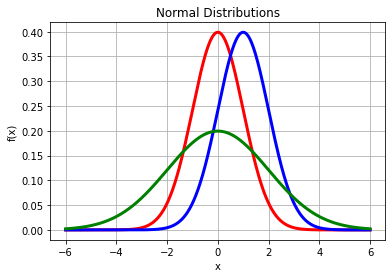

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
mean = 0
std = 1
x = np.linspace(mean - 3*(std+1), mean + 3*(std+1), 1000)  
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Normal Distributions')
ax.plot(x, norm.pdf(x, mean, std), 'r-', lw=3)
ax.plot(x, norm.pdf(x, mean+1, std), 'b-', lw=3)
ax.plot(x, norm.pdf(x, mean, std+1), 'g-', lw=3)
plt.grid()
plt.show()

## Standard Normal Distribution and Area Under the Normal Curve
----

The distribution of a random normal variable with $\mu = 0$ and $\sigma = 1$ is called a **standard normal distribution**. Notations are $n(x;0,1)$ or $N(0,1)$. Thus, the red plot above refers to the standard normal distribution.

<br>

Just as the case of the Poisson distribution, a table is also provided to solve problems "by hand", when dealing with the normal distribution. In other words, a table that provides the <a href="https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Extra/standard normal_table.pdf">cdf</a> ($P (Z \leq z)$) or, alternatively, a **standard normal distribution table** that gives values representing the **area** to the left of the $z$ score. 

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/arealeft.png" alt="Drawing" width="600"/>

<br>

But, what is $Z$? $Z$ is a new normal random variable which indeed has a standard normal distribution ($N(0,1)$). The whole point is that there is no sense to construct a table for every pair of mean and standard deviation! We have infinite tables to build. Then, we transform any normal random variable, $X$, into a standard normal random variable, $Z$, and thus we just need to have a unique standard normal distribution table to solve the problems. Such a transformation is done as shown below:

$$
Z = \frac{X - \mu}{\sigma}.
$$

<br>

Ex: Let $X$ be a random normal variable with $\mu = 50$ and $\sigma = 10$. What is the probability that $X$ assumes a number between 45 and 62?

R: We want $P(45 < X < 62) = P(\frac{45 - 50}{10} < Z < \frac{62 - 50}{10}) = P (-0.5 < Z < 1.2)$.

But, $P (-0.5 < Z < 1.2) = P(Z < 1.2) - P(Z < -0.5) = 0.88493 - 0.30854 = 0.57639 $.






In [ ]:
x1, x2 = 45, 62
mean1, std1 = 50, 10

cdf_x1 = norm.cdf(x1,mean1,std1)
cdf_x2 = norm.cdf(x2,mean1,std1)
print('X(nonstandard) --> cdf_x1={} / cdf_x2={} - Res:  {}'.format(cdf_x1,cdf_x2,(cdf_x2 - cdf_x1)))

z1 = (x1 - mean1)/std1
z2 = (x2 - mean1)/std1

print('\n##########\n')

cdf_z1 = norm.cdf(z1,0,1)
cdf_z2 = norm.cdf(z2,0,1)
print('Z(standard) --> cdf_z1={} / cdf_z2={} - Res:  {}'.format(cdf_z1,cdf_z2,(cdf_z2 - cdf_z1)))


X(nonstandard) --> cdf_x1=0.3085375387259869 / cdf_x2=0.8849303297782918 - Res:  0.5763927910523049

##########

Z(standard) --> cdf_z1=0.3085375387259869 / cdf_z2=0.8849303297782918 - Res:  0.5763927910523049


## The Central Limit Theorem
----

As mentioned in <a href="https://www.statisticshowto.com/probability-and-statistics/normal-distributions/central-limit-theorem-definition-examples/">Statistics How To</a>, "the Central Limit Theorem states that the sampling distribution of the **sample means** approaches a **normal distribution** as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30".

<br>

In other words, this theorem states that if you randomly draw a sample of a population of cats, let us say that this sample has 1,000 cats, this sample itself might not be normally distributed. But if you now repeat the experiment say 100 times, then the 100 means of those 100 samples (each sample has a size equals to 1,000 cats) will approach a normal distribution.

<br>

The theorem is very important in probability theory because it means that probabilistic and statistical methods that work for normal distributions can be applicable to many problems which are characterised by other types of distributions. This is another fact that just reinforces the relevance of the normal distribution.





Ex: Let us assume that a customer orders an average $170 when buying from a store. We will create exponential distributions with this average. And see how the samples means aproach a normal distribution when we repeat the experiment.

<br>

**Important:** This example was presented by <a href="https://towardsdatascience.com/central-limit-theorem-explained-with-python-code-230884d40ce0">Sujeewa Kumaratunga</a> in a post published in Towards Data Science. The code presented below is literally the same as presented in the post. 

Mean of the samples is 170.03
Standard deviation of the samples is 5.93


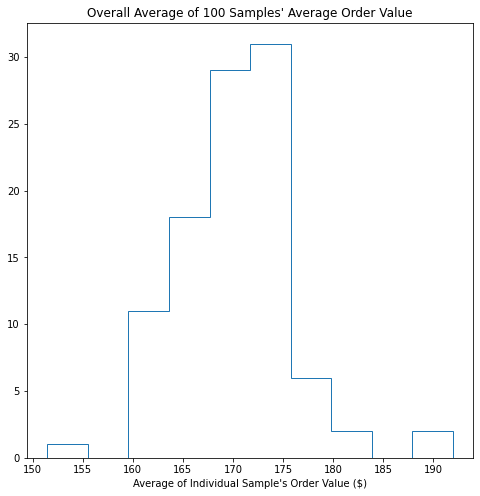

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def repeat_sample_draws_exponential(n, samp_size, mu, show_all=False):
    means = []

    samples = []
    '''
    Draw n = 100 samples (trials) of samp_size = 1000 customers.
    We will obtain 100 exponential distributions with mean mu and samp_size.                
    '''
    for ii in range(0, n):  
        samples.append(np.random.exponential(mu, samp_size))
        means.append(np.mean(samples[ii]))

    if show_all:
        pltdim = np.math.ceil(np.math.sqrt(n))
        fig, axs = plt.subplots(pltdim, pltdim, figsize=(8, 8), gridspec_kw={'hspace': 0.2}, sharex=True, sharey=True)
        fig.suptitle('Individual Samples\' Order Value Distribution')
        fig.text(0.5, 0.04, 'Order Values ($)', ha='center')
        fig.text(0.04, 0.5, 'Number of Customers', ha='center', rotation='vertical')
        axs = axs.flatten()
        for ii in range(0, n):

            plt.sca(axs[ii])

            plt.gca().hist(samples[ii], bins=int(50), histtype='step',
                           label='$mean = {0:.2f}$'.format(np.mean(samples[ii])), range=[0, 2 * mu])
            if n < 10:
                plt.gca().set_title('Sample #{0} : average={1:.2f}'.format(ii, np.mean(samples[ii])))
            for item in ([axs[ii].title, axs[ii].xaxis.label, axs[ii].yaxis.label] +
                             axs[ii].get_xticklabels() + axs[ii].get_yticklabels()):
                item.set_fontsize(8)

        plt.savefig('expdist_{0}_mu_{1}_sample_{2}_sampsize'.format(mu, n, samp_size))

    plt.clf()
    plt.hist(means, bins=int(10), histtype='step')
    plt.title('Overall Average of {} Samples\' Average Order Value'.format(n))
    plt.xlabel('Average of Individual Sample\'s Order Value ($)')
    plt.savefig('average_of_expdist_{0}_mu_{1}_sample_{2}_sampsize'.format(mu, n, samp_size))
    print('Mean of the samples is {0:.2f}'.format(np.mean(means)))
    print('Standard deviation of the samples is {0:.2f}'.format(np.std(means)))

n_trials = 100
n_customers = 1000
order_avg = 170
repeat_sample_draws_exponential(n_trials, n_customers, order_avg, True)


Ex1: The heights of a sample of trees are normally distributed with mean ($\mu$) and standard deviation ($\sigma$) 50 cm. Given that 22.36\% of the trees are shorter than 150 cm, determine $\mu$.

R: $P (X < 150) = P (Z < \frac{X - \mu}{\sigma}) = P (Z < \frac{150 - \mu}{50}) = 0.2236$. Looking at the the standard normal table we find that $z = -0.76$ gives an area equals to 0.2236. Thus:

$$
-0.76 = \frac{150 - \mu}{50} \Rightarrow \mu = 188 cm.
$$

<br>

Ex2: Let us assume that the Brazilian men population is normally distributed with mean equals to 175 cm and standard deviation of 4 cm. What is the probability of a Brazilian man is taller than 185 cm?

R: $P (X > 185) = 1 - P(X < 185) = 1 - P (Z < \frac{185 - 175}{4}) = 1 - P(Z < 2.5)$. The standard normal table says that $P (Z < 2.5) = 0.99379 $. Thus:

$$
P (X > 185) = 1 - 0.99379  = 0.0062100000
$$

In [ ]:
#Ex2
mean = 175
std = 4
x = 185
cdf_x = norm.cdf(x,mean,std)
z = (x - mean)/std
cdf_z = norm.cdf(z,0,1)

print('Response X = {} and Z = {}'.format(1 - cdf_x, 1 - cdf_z))

Response X = 0.006209665325776159 and Z = 0.006209665325776159
